<a href="https://colab.research.google.com/github/joaohernandes/intelli/blob/main/AtividadePCA_JoaoHernandes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade João Otávio Rocha Hernandes

# 1. Implemente a técnica PCA, testando ao menos 5 variações para componentes.


In [ ]:
import pandas as pd

In [ ]:
# Carregar a base de dados
df = pd.read_csv("/content/census.csv")

# Visualizar as primeiras linhas e os nomes das colunas
df.head()

(   age          workclass  final-weight   education  education-num  \
 0   39          State-gov         77516   Bachelors             13   
 1   50   Self-emp-not-inc         83311   Bachelors             13   
 2   38            Private        215646     HS-grad              9   
 3   53            Private        234721        11th              7   
 4   28            Private        338409   Bachelors             13   
 
         marital-status          occupation    relationship    race      sex  \
 0        Never-married        Adm-clerical   Not-in-family   White     Male   
 1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
 2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
 3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
 4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
 
    capital-gain  capital-loos  hour-per-week  native-country  income  
 0          2174  

In [ ]:
#Preparar os dados
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# One-hot encoding
X = pd.get_dummies(X)

# Normalização dos Dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Treinar Random Forest sem PCA
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_no_pca = rf.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

#Aplicar PCA com diferentes números de componentes e avaliar
pca_results = {}
for n_components in [5, 10, 15, 20, 25]:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    rf_pca = RandomForestClassifier(random_state=42)
    rf_pca.fit(X_train_pca, y_train_pca)
    y_pred_pca = rf_pca.predict(X_test_pca)

    acc = accuracy_score(y_test_pca, y_pred_pca)
    pca_results[n_components] = acc

accuracy_no_pca, pca_results


(0.8535162247927116,
 {5: 0.8276179752277613,
  10: 0.8325314771215068,
  15: 0.8315078308936431,
  20: 0.8320196540075749,
  25: 0.8312007370252841})

# 2. Implemente a classificação com Random sem a utilização do PCA, compare os resultados.

In [ ]:
import matplotlib.pyplot as plt

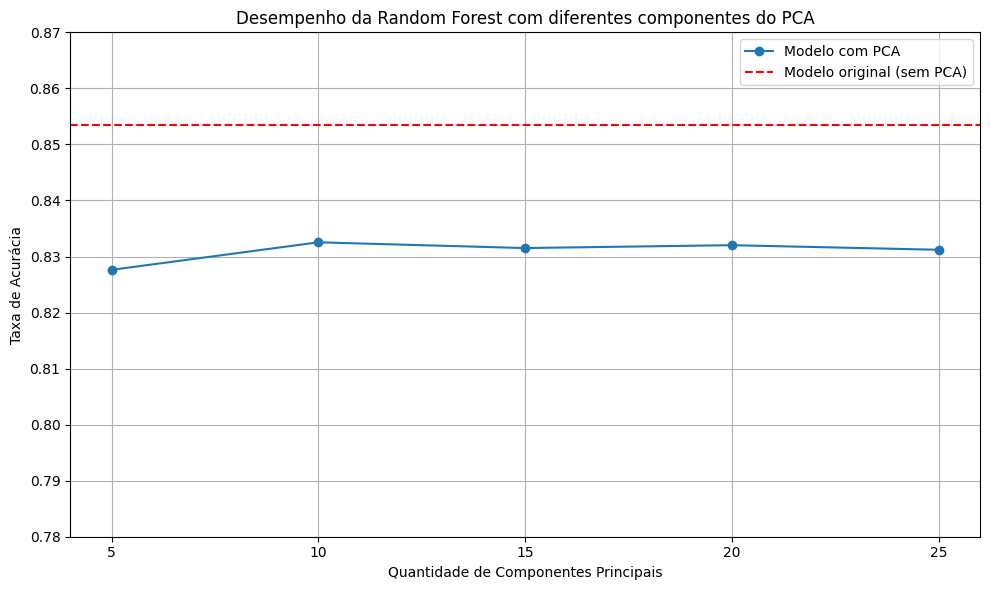

In [ ]:
# Gerar gráfico para visualizar os desempenhos
components = list(pca_results.keys())
accuracies = list(pca_results.values())

plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, marker='o', label='Modelo com PCA')
plt.axhline(y=accuracy_no_pca, color='r', linestyle='--', label='Modelo original (sem PCA)')
plt.title('Desempenho da Random Forest com diferentes componentes do PCA')
plt.xlabel('Quantidade de Componentes Principais')
plt.ylabel('Taxa de Acurácia')
plt.xticks(components)
plt.ylim(0.78, 0.87)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
